# Contexte
### Teamfight Tactics est un jeu de type « autochess ».
### Il y a huit joueurs qui s'affrontent dans la partie. Le dernier en vie a gagné. Il s’agit d’un jeu de tactique et de stratégie, où vous construisez votre équipe au fur et à mesure. À chaque tour, vous envoyez des personnages avec des synergies sur le plateau de jeu, et ils affrontent ceux de l’équipe adverse. Après chaque tour, l’un des deux joueurs a perdu, et subi des dégâts. Lorsque vous avez subi 100 points de dégâts, vous êtes éliminé.



# Analyse

### On Importe les librairies nécessaires 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import ast

In [2]:
sns.set_theme()

### On Importe les données des joueurs Platine et Challenger

In [3]:
DataPlat = pd.read_csv('Data/TFT_Platinum_MatchData.csv');
DataChall = pd.read_csv('Data/TFT_Challenger_MatchData.csv');

### Afin de garder l'indexation et avoir une lecture des données plus rapide, nous allons garder seulement les 1000 premières parties

In [4]:
DataPlat = DataPlat.head(1000)
DataChall = DataChall.head(1000)

DataPlat
# DataChall

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {..."
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':..."
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ..."
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {..."
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}..."
...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra..."
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ..."
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ..."
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI..."


In [5]:
DataPlat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          1000 non-null   object 
 1   gameDuration    1000 non-null   float64
 2   level           1000 non-null   int64  
 3   lastRound       1000 non-null   int64  
 4   Ranked          1000 non-null   int64  
 5   ingameDuration  1000 non-null   float64
 6   combination     1000 non-null   object 
 7   champion        1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


### Nous allons récupérer seulement la composition principale de chaque joueur afin d'avoir une analyse pertinente (colonne "combination").

### Pour cela on récupéré seulement la composition qui contient le plus de personnages, s'il y en a plusieurs à la même valeur alors on les associent

In [6]:
DataPlat.insert(8, "composition", "Any")
DataChall.insert(8, "composition", "Any")

DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {...",Any
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':...",Any
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ...",Any
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {...",Any
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}...",Any
...,...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra...",Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ...",Any
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ...",Any
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI...",Any


In [7]:
for i in range(len(DataPlat)) : 
    
    if len(ast.literal_eval(DataPlat.combination[i])) > 0 :

        max_value = max(ast.literal_eval(DataPlat.combination[i]).values())
        max_keys = [k for k, v in ast.literal_eval(DataPlat.combination[i]).items() if v == max_value]

        if len(max_keys) == 1 :
            result = max_keys[0]
        elif len(max_keys) > 1 :
            result = ""
            for i in range(len(max_keys) - 1) :
                result = result + max_keys[i] +"/"
        else :
            result = "Any"
            
#         print(result)
        DataPlat.composition[i] = result

<ipython-input-7-017131ad9fe0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataPlat.composition[i] = result


In [8]:
for i in range(len(DataChall)) : 
    
    if len(ast.literal_eval(DataChall.combination[i])) > 0 :

        max_value = max(ast.literal_eval(DataChall.combination[i]).values())
        max_keys = [k for k, v in ast.literal_eval(DataChall.combination[i]).items() if v == max_value]

        if len(max_keys) == 1 :
            result = max_keys[0]
        elif len(max_keys) > 1 :
            result = ""
            for i in range(len(max_keys) - 1) :
                result = result + max_keys[i] +"/"
        else :
            result = "Any"
            
#         print(result)
        DataChall.composition[i] = result

<ipython-input-8-66f5b3b139a3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataChall.composition[i] = result


### On récupère donc une nouvelle colonne "composition" avec la combinaison principale du joueur

In [9]:
# DataChall
DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {...",Set3_Sorcerer/
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':...",Chrono/ManaReaver/
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ...",Chrono/Set3_Blademaster/Valkyrie/
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {...",Demolitionist/Set3_Celestial/Sniper/SpacePirate/
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}...",Rebel/Set3_Blademaster/Set3_Celestial/Sniper/S...
...,...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra...",Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ...",Rebel
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ...",SpacePirate
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI...",Set3_Celestial


### On peut donc maintenant enlever la colonne "combination" que l'on a refait selon notre besoin et supprimer la colonne "champion" qui n'est pas utile à l'analyse

In [10]:
DataPlat = DataPlat.drop(columns=["combination", "champion"], axis='columns')
DataChall = DataChall.drop(columns=["combination", "champion"], axis='columns')

DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,Set3_Sorcerer/
1,KR_4291707834,1963.905273,8,37,3,1891.282715,Chrono/ManaReaver/
2,KR_4291707834,1963.905273,6,25,7,1279.461060,Chrono/Set3_Blademaster/Valkyrie/
3,KR_4291707834,1963.905273,7,38,2,1955.608521,Demolitionist/Set3_Celestial/Sniper/SpacePirate/
4,KR_4291707834,1963.905273,8,38,1,1955.608521,Rebel/Set3_Blademaster/Set3_Celestial/Sniper/S...
...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,Rebel
997,KR_4389301206,1988.682129,8,35,3,1908.315430,SpacePirate
998,KR_4389301206,1988.682129,9,37,1,1980.388916,Set3_Celestial


### On supprime toutes les données où le joueur a revendu sa composition avant la fin de partie pour ne pas fausser les données

In [11]:
to_delPlat = DataPlat[DataPlat["composition"] == "Any"].index.tolist()
to_delChall = DataChall[DataChall["composition"] == "Any"].index.tolist()

DataPlat= DataPlat.drop(to_delPlat)
DataChall= DataChall.drop(to_delChall)

DataPlat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          776 non-null    object 
 1   gameDuration    776 non-null    float64
 2   level           776 non-null    int64  
 3   lastRound       776 non-null    int64  
 4   Ranked          776 non-null    int64  
 5   ingameDuration  776 non-null    float64
 6   composition     776 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.5+ KB


In [12]:
DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,Set3_Sorcerer/
1,KR_4291707834,1963.905273,8,37,3,1891.282715,Chrono/ManaReaver/
2,KR_4291707834,1963.905273,6,25,7,1279.461060,Chrono/Set3_Blademaster/Valkyrie/
3,KR_4291707834,1963.905273,7,38,2,1955.608521,Demolitionist/Set3_Celestial/Sniper/SpacePirate/
4,KR_4291707834,1963.905273,8,38,1,1955.608521,Rebel/Set3_Blademaster/Set3_Celestial/Sniper/S...
...,...,...,...,...,...,...,...
994,KR_4389301206,1988.682129,7,37,2,1980.388916,Infiltrator
996,KR_4389301206,1988.682129,8,31,7,1683.837524,Rebel
997,KR_4389301206,1988.682129,8,35,3,1908.315430,SpacePirate
998,KR_4389301206,1988.682129,9,37,1,1980.388916,Set3_Celestial


### Maintenant que nos données sont prêtes, on va chercher à comprendre les différences entre les joueurs Platine et Challenger

### Dans un premier temps, comparons le niveau atteint des joueurs en fin de partie

Text(0.5, 1.0, 'Niveau en fin de partie des joueurs Challenger')

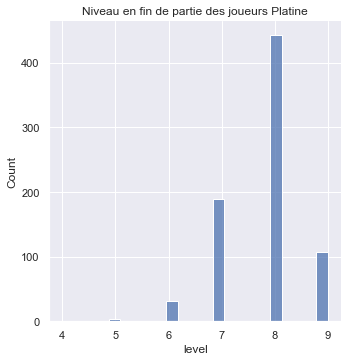

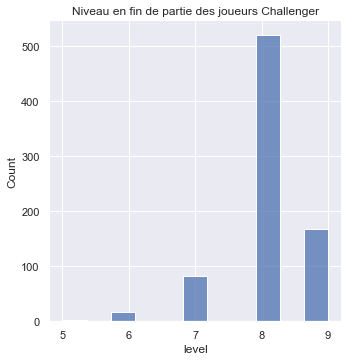

In [96]:
sns.displot(x="level",data=DataPlat)
plt.title("Niveau en fin de partie des joueurs Platine")
sns.displot(x="level",data=DataChall)
plt.title("Niveau en fin de partie des joueurs Challenger")

### Comme on peut le constater les joueurs challenger ont plus tendance à atteindre le niveau 9 que les platines qui eux ont plus de joueurs niveau 6 et 7.
### Cependant, on remarque que des deux côtés une majorité termine la partie au niveau 8

### Nous allons donc voir si le niveau atteint en fin de partie influe sur la victoire chez les challengers, sachant qu'un "Rank" 1,2,3 ou 4 représentent une victoire et que 5,6,7 et 8 représentent une défaite

### On va donc interpréter la donnée de cette façon 1=Victoire et 0=Defaite

Text(0.5, 1.0, 'Victoire par rapport aux niveaux des joueurs Challenger ')

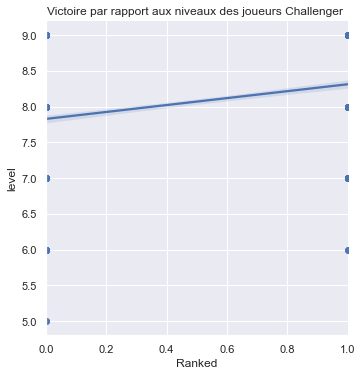

In [95]:
DataChall01 = DataChall.copy()
DataPlat01 = DataPlat.copy()
DataChall01.Ranked = DataChall01.Ranked.replace(to_replace = [2,3,4,5,6,7,8] , value=[1,1,1,0,0,0,0])
DataPlat01.Ranked = DataPlat01.Ranked.replace(to_replace = [2,3,4,5,6,7,8] , value=[1,1,1,0,0,0,0])

sns.lmplot(x="Ranked", y="level", data=DataChall01)
plt.title("Victoire par rapport aux niveaux des joueurs Challenger ")

### On remarque donc que plus le joueur tend vers le niveau 9 plus il tend vers une victoire

### On peut donc en supposer qu'atteindre le niveau 9 augmente nos chances de gagner

### Notre but est de comprendre comment devenir challenger, nous allons créer une heatmap afin de voir quelles sont les facteurs les plus importants pour obtenir une victoire en challenger

In [90]:
DataCorrPlat = DataPlat01.corr()
DataCorrChall = DataChall01.corr()

# DataCorrPlat
DataCorrChall

,gameDuration,level,lastRound,Ranked,ingameDuration
gameDuration,1.000000,0.022100,0.159967,-0.018486,0.319016
level,0.022100,1.000000,0.527782,0.374191,0.496557
lastRound,0.159967,0.527782,1.000000,0.751264,0.952496
Ranked,-0.018486,0.374191,0.751264,1.000000,0.720364
ingameDuration,0.319016,0.496557,0.952496,0.720364,1.000000


Text(0.5, 1.0, 'Corrélation du dataset des joueurs Challenger')

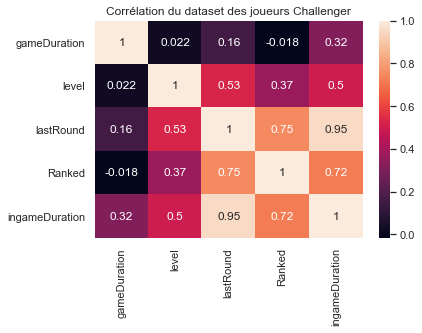

In [88]:
sns.heatmap(DataCorrChall, annot=True)
plt.title("Corrélation du dataset des joueurs Challenger")

### On comprend donc que les facteurs les plus importants pour obtenir une victoire ("Ranked"), sont le "lastRound" et le "level"


### On va donc s'interesser au "lastRound"

Text(0.5, 1.0, 'Nombre de rounds joués avant de perdre des joueurs Platine')

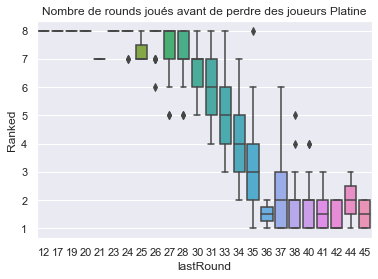

In [98]:
sns.boxplot(data=DataPlat, x="lastRound", y="Ranked")
plt.title("Nombre de rounds joués avant de perdre des joueurs Platine")

Text(0.5, 1.0, 'Nombre de rounds joués avant de perdre des joueurs Challenger')

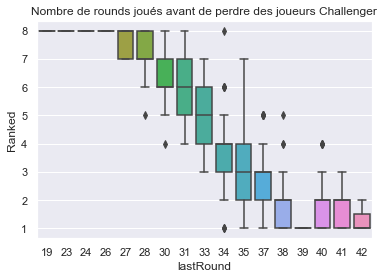

In [99]:
sns.boxplot(data=DataChall, x="lastRound", y="Ranked")
plt.title("Nombre de rounds joués avant de perdre des joueurs Challenger")

### On peut donc supposer ici que les parties des joueurs Challenger sont bien plus radicales que les parties des joueurs Platine. En effet, les premiers joueurs Challenger éliminés sont au round 27 contre 25 en Platine.
### Malgré cela, les joueurs Challenger finissent les parties en moins de round, 42 maximum contre 45 chez les Platine.
### Désormais, nous allons voir les différentes compositions jouées et leurs taux de victoire

Text(0.5, 1.0, 'Rang des compositions jouées des joueurs Platine')

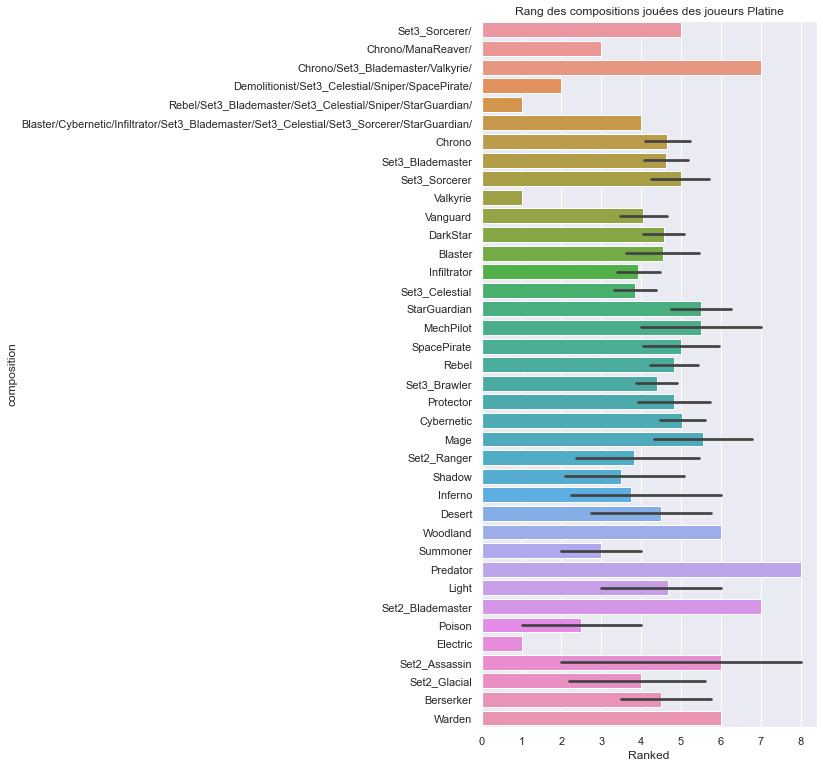

In [101]:
plt.subplots(figsize=(6,13))
sns.barplot(y="composition", x="Ranked" , data=DataPlat)
plt.title("Rang des compositions jouées des joueurs Platine")

Text(0.5, 1.0, 'Nombre de parties jouées par composition des joueurs Platine')

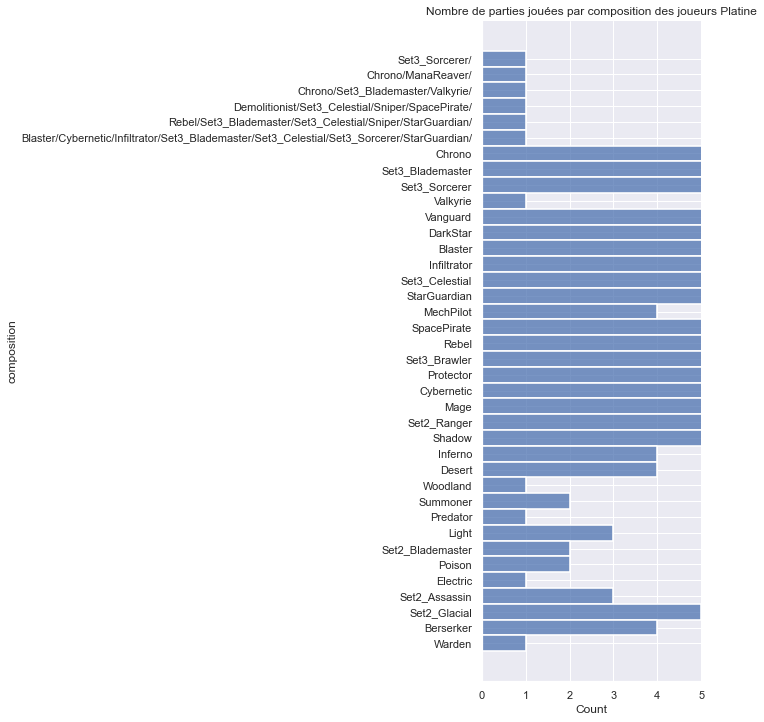

In [102]:
sns.displot(y="composition",data=DataPlat, height=10,)
plt.xlim(0,5)
plt.title("Nombre de parties jouées par composition des joueurs Platine")

Text(0.5, 1.0, 'Rang des compositions jouées des joueurs Challenger')

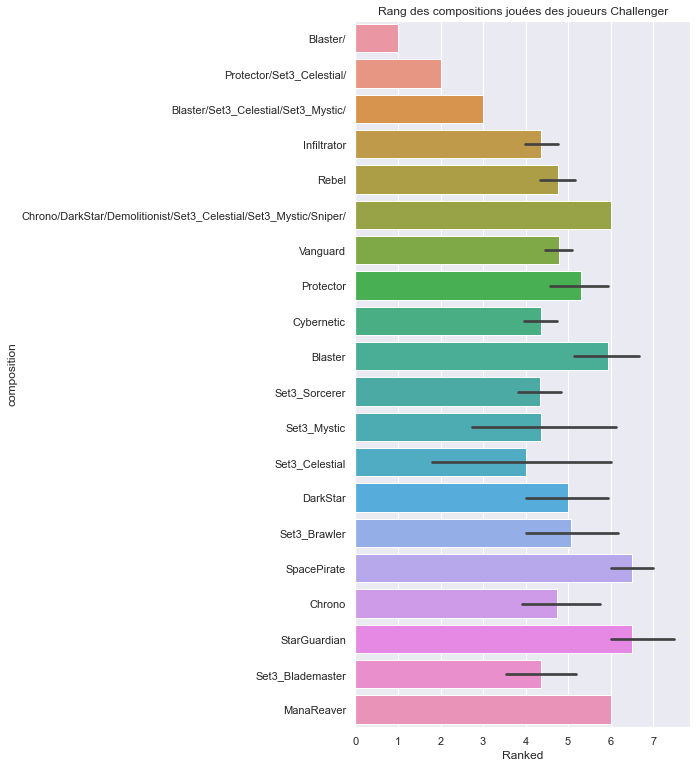

In [103]:
plt.subplots(figsize=(6,13))
sns.barplot(y="composition", x="Ranked" , data=DataChall,)
plt.title("Rang des compositions jouées des joueurs Challenger")

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Nombre de parties jouées par composition des joueurs Challenger')

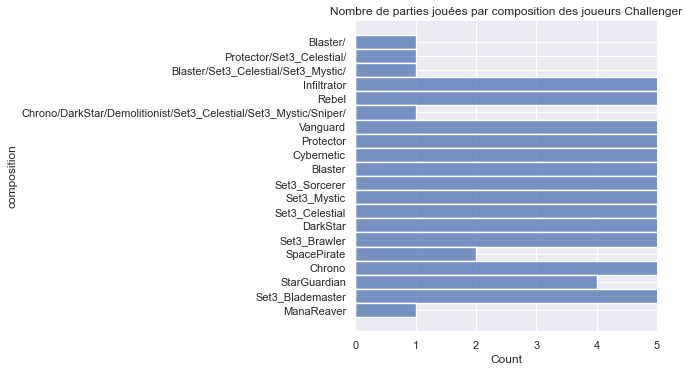

In [104]:
sns.displot(y="composition",data=DataChall)
plt.xlim(0,5)
plt.title("Nombre de parties jouées par composition des joueurs Challenger")

### Afin de ne pas fausser l'analyse on regarde le nombre de parties jouées par composition, on constate chez les challengers que la composition 'Blaster' par exemple a été joué qu'une seule fois elle ne sera donc pas représentative.

### On peut constater que les joueurs Challenger jouent une variété de compositions plus restreinte que les Platine
### Cependant, on peut voir cetaines compositions sortent du lot des deux cotés comme "Set3_Celestial" pour obtenir une victoire

### Notre dernier critère à aborder est le temps qu'on reste dans une partie ("ingameDuration"), nous allons donc voir s'il influe sur nos conditions de victoire

Text(0.5, 1.0, 'Temps passé dans la partie selon le rang')

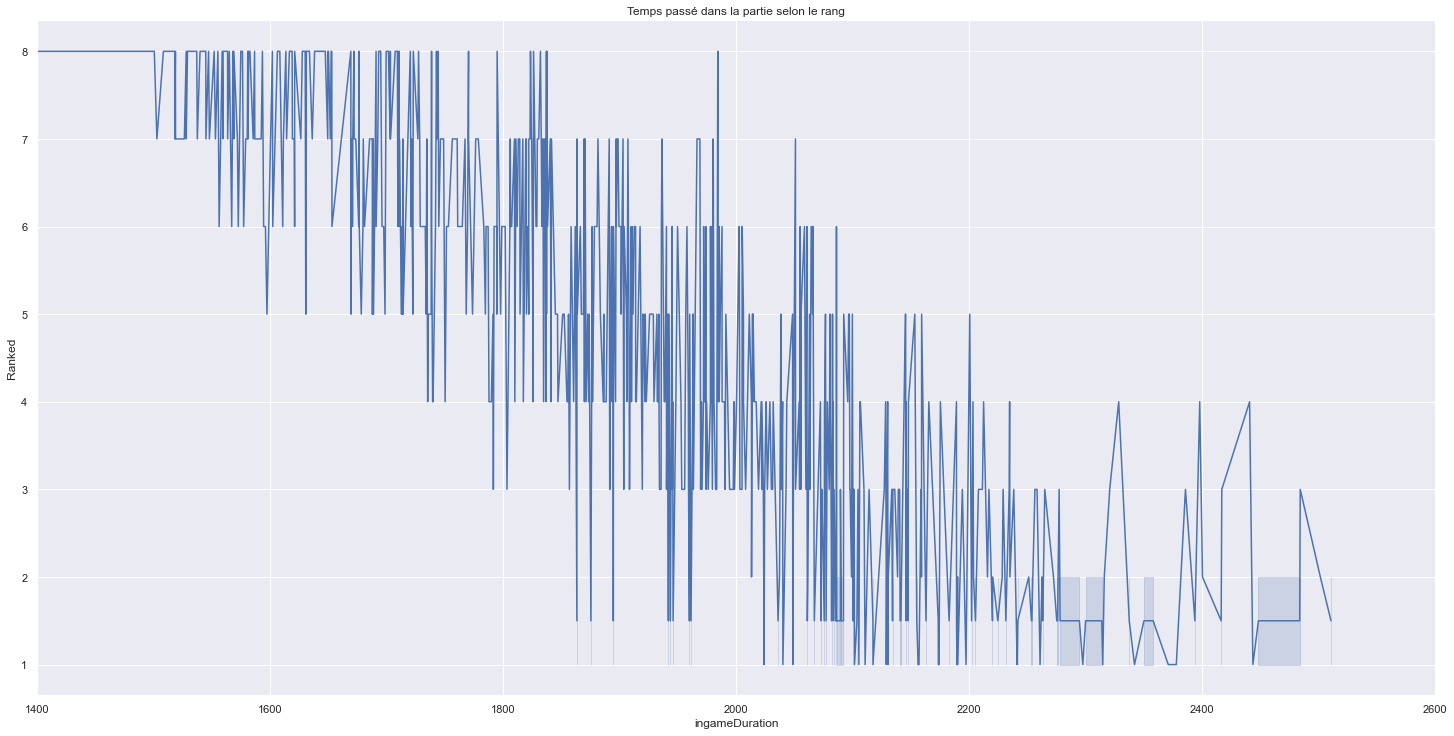

In [87]:
sns.relplot(data=DataChall, x="ingameDuration", y="Ranked",height=10, aspect=2, kind="line")
plt.xlim(1400,2600)
plt.title("Temps passé dans la partie selon le rang")

### On peux donc supposer que le temps qu'on reste dans la partie n'est pas réellement représentatif car il y a beaucoup trop de variations pricipalement entre 1700s et 2300s.
### Cependant, on peut constater que les joueurs qui restent en dessous de 1700s perdent forcément et les joueurs qui restent plus de 2300s gagnent.



# Conclusion

### D'après notre analyse nous pouvons constater les différences entre les joueurs platine et challenger.
### Pour que les joueurs platine passent en challenger ils devront donc :
#### - Ne pas rester au niveau 6 et 7 mais atteindre le plus rapidement possible le niveau 8, voir 9 pour optimiser les chances de victoire
#### - Renforcer son équipe vers le round 25 pour survivre plus longtemps
#### - Être plus agressif sur la fin de partie afin de faire tomber un maximum de point de vie aux adversaires pour finir en moins de round (42 recomandé)
#### - Réduire le nombre de compositions jouées
#### - Se diriger vers les compositions comme "Set3_Celestial","DarkStar","Set3_Brawler" qui gagne régulièrement
#### - Ne pas jouer les compositions comme "StarGuardian" et "SpacePirate" qui ont tendance à perdre

### Si l'ensemble des joueurs platine suivent ces conseils, ils devront tendre vers des parties qui dure plus de 2300s car ils optimiseront leurs chances de victoire.